In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem
from random import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



# Horror: Import and Clean Data

In [2]:
# File to Load (Remember to Change These)
horror_data_to_load = "data/Horror_dataframe.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
horror = pd.read_csv(horror_data_to_load)

#drop NAN (full row only)
horror_clean=horror.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
horror_clean["Start/Release_Year"] = horror_clean['Year'].str[:4]
horror_clean["Start/Release_Year"] = horror_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
horror_clean=horror_clean.loc[horror_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2000", "2001", "2002", "2003", "2004","2005", "2006",
         "2007","2008","2009","2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
horror_years=horror_clean[horror_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
horror_years["# of Votes"]=horror_years["# of Votes"].str.replace(',','')
horror_years["# of Votes"] = horror_years["# of Votes"].astype(float)



horror_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
0,tt1320304,30 Days of Night: Dark Days,movie,2010,USA,"Horror, Thriller",2 wins.,SPE Acquisitions,R,NaN,4.4,11772.0,2010.0
1,tt0858411,2001 Maniacs: Field of Screams,movie,2010,USA,"Comedy, Horror",NaN,First Look Studios,R,NaN,3.2,2161.0,2010.0
2,tt1753422,Alice in Murderland,movie,2010,USA,"Horror, Thriller",NaN,Sterling Entertainment,Not Rated,NaN,1.8,865.0,2010.0
3,tt1100051,Bereavement,movie,2010,USA,"Crime, Horror, Thriller",4 wins.,Crimson Films,R,NaN,5.1,6320.0,2010.0
4,tt0947798,Black Swan,movie,2010,USA,"Drama, Thriller",Won 1 Oscar. Another 91 wins & 257 nominations.,Fox Searchlight,R,79.0,8.0,660992.0,2010.0


# Comedy: Import and Clean Data

In [17]:
# File to Load (Remember to Change These)
comedy_data_to_load = "data/Comedy_dataframe.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
comedy = pd.read_csv(comedy_data_to_load)

#drop NAN (full row only)
comedy_clean=comedy.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
comedy_clean["Start/Release_Year"] = comedy_clean['Year'].str[:4]
comedy_clean["Start/Release_Year"] = comedy_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
comedy_clean=comedy_clean.loc[comedy_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2000", "2001", "2002", "2003", "2004","2005", "2006",
         "2007","2008","2009","2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
comedy_years=comedy_clean[comedy_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
comedy_years["# of Votes"]=comedy_years["# of Votes"].str.replace(',','')
comedy_years["# of Votes"] = comedy_years["# of Votes"].astype(float)



comedy_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
0,tt1038919,The Bounty Hunter,movie,2010,USA,"Action, Comedy, Romance",4 wins & 5 nominations.,Sony Pictures,PG-13,22.0,5.6,114202.0,2010.0
1,tt1385867,Cop Out,movie,2010,USA,"Action, Comedy, Crime, Thriller",1 nomination.,Warner Bros. Pictures,R,31.0,5.6,82489.0,2010.0
2,tt1336617,Cyrus,movie,2010,USA,"Comedy, Drama, Romance",6 nominations.,Fox Searchlight,R,74.0,6.3,32830.0,2010.0
3,tt1279935,Date Night,movie,2010,USA,"Comedy, Crime, Romance, Thriller",4 wins & 8 nominations.,20th Century Fox,PG-13,56.0,6.3,146296.0,2010.0
4,tt0795368,Death at a Funeral,movie,2007,"USA, Germany, UK, Netherlands",Comedy,2 wins & 2 nominations.,NaN,R,67.0,7.4,103945.0,2007.0


# Docu: Import and Clean Data

In [18]:
# File to Load (Remember to Change These)
docu_data_to_load = "data/Docu_dataframe.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
docu = pd.read_csv(docu_data_to_load)

#drop NAN (full row only)
docu_clean=docu.dropna(how='all', inplace=False)


#convert year to single year (start year for series)
docu_clean["Start/Release_Year"] = docu_clean['Year'].str[:4]
docu_clean["Start/Release_Year"] = docu_clean["Start/Release_Year"].astype(float)

#filter for Country containing USA
docu_clean=docu_clean.loc[docu_clean.Country.str.contains("USA", na=False)]


#keep media with Start/Release Years of 2010-2019
years = ["2000", "2001", "2002", "2003", "2004","2005", "2006",
         "2007","2008","2009","2010", "2011", "2012", "2013",
         "2014", "2015", "2016", "2017", "2018"]
docu_years=docu_clean[docu_clean["Start/Release_Year"].isin(years)]


#convert # of votes to float for later calculation
docu_years["# of Votes"]=docu_years["# of Votes"].str.replace(',','')
docu_years["# of Votes"] = docu_years["# of Votes"].astype(float)



docu_years.head()


,IMDB ID,Title,Type of Media,Year,Country,Genre,Awards,Production Company,Rating,Metascore,IMDB Rating,# of Votes,Start/Release_Year
0,tt0972541,1 More Hit,movie,2007,USA,"Documentary, Music",1 nomination.,NaN,NaN,NaN,5.6,16.0,2007.0
2,tt2247692,2016: Obama's America,movie,2012,USA,Documentary,1 nomination.,Rocky Mountain Pictures,PG,28.0,5.0,10197.0,2012.0
5,tt0448881,500 Dunam on the Moon,movie,2002,USA,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,2002.0
6,tt0444593,500 Years Later,movie,2005,"UK, USA",Documentary,2 wins.,Codeblack TV,Not Rated,NaN,6.8,179.0,2005.0
9,tt0446083,10 MPH,movie,2007,USA,Documentary,2 wins.,Spinning Blue,NOT RATED,NaN,6.8,377.0,2007.0


# Horror: Productions by Year

(0, 37)

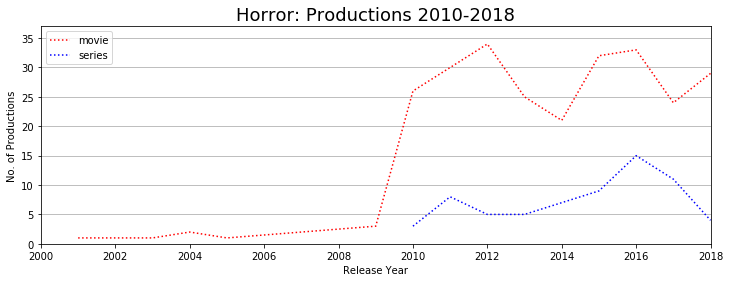

In [14]:
# Store number of productions grouped by media type and release year 
horror_gb = horror_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = horror_gb["Title"].count()

# Convert to DataFrame & reset index
horror_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
horror_df_1 = horror_df_1.reset_index()


# Re-Format the Data Frame
horror_df_1 = horror_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
horror_df_1.reset_index()

#plot number of productions
df=horror_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()
ax.set_title('Horror: Productions 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("No. of Productions")

plt.xlim(2000, 2018)
plt.ylim(0, 37)



# Comedy: Productions by Year

(0, 60)

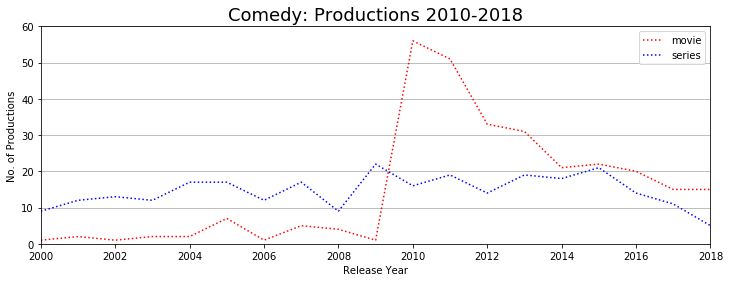

In [21]:
# Store number of productions grouped by media type and release year 
comedy_gb = comedy_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = comedy_gb["Title"].count()

# Convert to DataFrame & reset index
comedy_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
comedy_df_1 = comedy_df_1.reset_index()


# Re-Format the Data Frame
comedy_df_1 = comedy_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
comedy_df_1.reset_index()

#plot number of productions
df=comedy_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()
ax.set_title('Comedy: Productions 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("No. of Productions")

plt.xlim(2000, 2018)
plt.ylim(0, 60)

# Docu: Productions by Year

(0, 60)

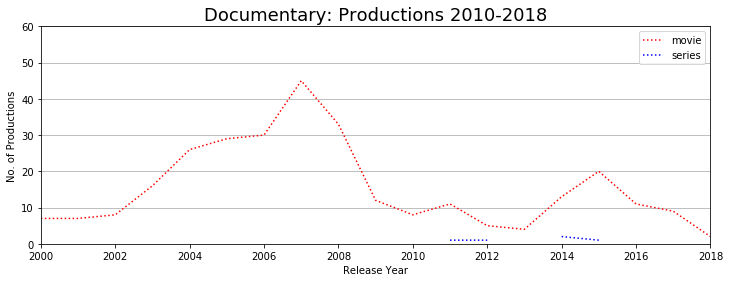

In [23]:
# Store number of productions grouped by media type and release year 
docu_gb = docu_years.groupby(["Type of Media", "Start/Release_Year"])
Number_Produced = docu_gb["Title"].count()

# Convert to DataFrame & reset index
docu_df_1 = pd.DataFrame({"No. of Productions": Number_Produced})
docu_df_1 = docu_df_1.reset_index()


# Re-Format the Data Frame
docu_df_1 = docu_df_1.pivot(index='Start/Release_Year', columns='Type of Media', values='No. of Productions')
docu_df_1.reset_index()

#plot number of productions
df=docu_df_1

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()
ax.set_title('Documentary: Productions 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("No. of Productions")

plt.xlim(2000, 2018)
plt.ylim(0, 60)

# Horror: IMDB Ratings

(0, 10)

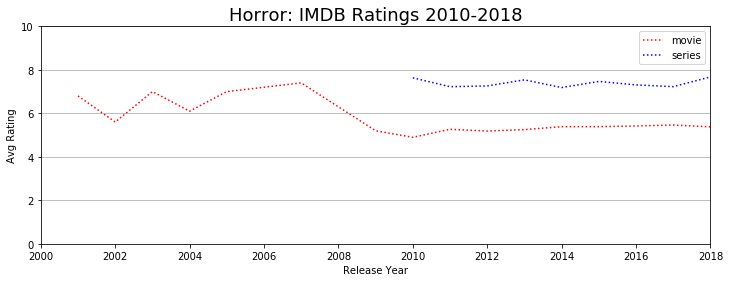

In [16]:
# Store number of productions grouped by media type and release year 
horror_gb = horror_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = horror_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
horror_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
horror_df_2 = horror_df_2.reset_index()


# Re-Format the Data Frame
horror_df_2 = horror_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
horror_df_2.reset_index()
    
 #plot number of productions
df=horror_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()

ax.set_title('Horror: IMDB Ratings 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("Avg Rating")

plt.xlim(2000, 2018)
plt.ylim(0, 10)
   

 # Comedy: IMDB Ratings

(0, 10)

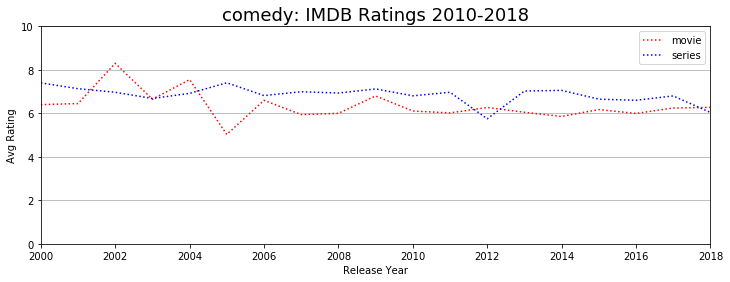

In [22]:
# Store number of productions grouped by media type and release year 
comedy_gb = comedy_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = comedy_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
comedy_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
comedy_df_2 = comedy_df_2.reset_index()


# Re-Format the Data Frame
comedy_df_2 = comedy_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
comedy_df_2.reset_index()
    
 #plot number of productions
df=comedy_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()

ax.set_title('Comedy: IMDB Ratings 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("Avg Rating")

plt.xlim(2000, 2018)
plt.ylim(0, 10)
   

# Docu: IMDB Ratings

(0, 10)

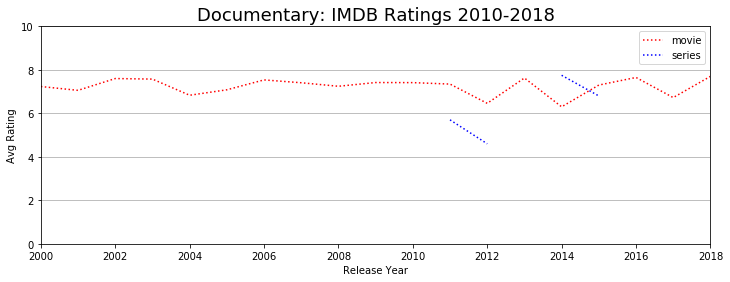

In [25]:
# Store number of productions grouped by media type and release year 
docu_gb = docu_years.groupby(["Type of Media", "Start/Release_Year"])
avg_IMDB_rating = docu_gb["IMDB Rating"].mean()

# Convert to DataFrame & reset index
docu_df_2 = pd.DataFrame({"Avg IMDB Rating": avg_IMDB_rating})
docu_df_2 = docu_df_2.reset_index()


# Re-Format the Data Frame
docu_df_2 = docu_df_2.pivot(index='Start/Release_Year', columns='Type of Media', values='Avg IMDB Rating')
docu_df_2.reset_index()
    
 #plot number of productions
df=docu_df_2

ax = df.plot(kind='line', y="movie",color="red",linestyle="dotted",figsize=(12, 4))

df.plot(kind='line', y="series",color="blue",linestyle="dotted", ax=ax)

#format and titles
ax.yaxis.grid()

ax.set_title('Documentary: IMDB Ratings 2010-2018',fontsize= 18)
ax.set_xlabel("Release Year")
ax.set_ylabel("Avg Rating")

plt.xlim(2000, 2018)
plt.ylim(0, 10)